In [1]:
import os
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Crawling Data using BeautifulSoup

In [2]:
url = 'D:/פרויקט מדעי הנתונים - נדלן חולון/NADLAN.html'
page = open(url, encoding="utf8")
soup = BeautifulSoup(page.read())

In [3]:
tables = soup.find_all('div', {'class': "tableCol"})

In [4]:
table_list = []

for table in tables:
    table_list.append(table.text)

In [5]:
for i in range(len(table_list)):
    #print(table_list[i].strip())
    table_list[i] = table_list[i].strip()

In [6]:
Date = []
Month = []
Address = []
Room = []
Size = []
Price = []
Change = []
Variance = []

lsize = len(table_list)

for i in range(int(lsize/10)):
    Date.append(table_list[i*10])
    Month.append(int(table_list[i*10][3:5]))

    adress = table_list[(i*10)+1]
    adress = adress.split(' ')    
    Address.append(' '.join(adress[:-1]))
    
    Room.append(float(table_list[(i*10)+4]))

    size = table_list[(i*10)+6]
    if not size == '':
        Size.append(float(size))
    else:
        Size.append(0)

    price = table_list[(i*10)+7]
    price = price.replace(',', '')
    Price.append(float(price))

    change = table_list[(i*10)+8]
    change = change.split(' ')
    if len(change) == 4:
        percent = float(change[0][:-1])
        period = float(change[2])
        Variance.append(float(percent/period))
    else:
        Variance.append(0)
    Change.append(table_list[(i*10)+8])

In [7]:
df = pd.DataFrame({"יום מכירה":Date,
                   "חודש למכור":Month,
                   "כתובת": Address,
                   "חדרים": Room,
                   'מ"ר': Size,
                   "סכום": Price,
                  "מגמת שינוי": Change,
                  "שונות":Variance})

df.to_csv('D:/פרויקט מדעי הנתונים - נדלן חולון/Final DB.csv', encoding = 'utf-8-sig', index_label='#')

In [8]:
df

,יום מכירה,חודש למכור,כתובת,חדרים,"מ""ר",סכום,מגמת שינוי,שונות
0,02.11.2021,11,סוקולוב,3.0,49.72,1200000.0,,0.000000
1,31.10.2021,10,אלעזר דוד,3.0,62.00,1500000.0,,0.000000
2,30.10.2021,10,לבון פנחס,5.0,102.00,1600000.0,,0.000000
3,29.10.2021,10,חיטמן עוזי,4.0,91.00,2625000.0,140% ב 14.3 שנים,9.790210
4,26.10.2021,10,מונטיפיורי,3.0,58.91,1600000.0,32% ב 17.9 שנים,1.787709
...,...,...,...,...,...,...,...,...
23835,30.12.2009,12,שמריהו לוין,4.0,102.60,1600000.0,,0.000000
23836,30.12.2009,12,גבעת התחמושת,4.0,87.98,1250000.0,,0.000000
23837,30.12.2009,12,איריס,3.0,70.90,985000.0,,0.000000
23838,29.12.2009,12,הגלעד,3.0,50.00,849000.0,65% ב 11.3 שנים,5.752212


# Pre-processing

## Droping NAN values


In [9]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df =df.dropna()
df = df[df['חדרים'] > 0]
df

,יום מכירה,חודש למכור,כתובת,חדרים,"מ""ר",סכום,מגמת שינוי,שונות
3,29.10.2021,10,חיטמן עוזי,4.0,91.00,2625000.0,140% ב 14.3 שנים,9.790210
4,26.10.2021,10,מונטיפיורי,3.0,58.91,1600000.0,32% ב 17.9 שנים,1.787709
5,26.10.2021,10,ז'בוטינסקי,3.0,54.94,1500000.0,162% ב 14.5 שנים,11.172414
6,26.10.2021,10,דיין משה,5.0,106.00,2320000.0,157% ב 13.5 שנים,11.629630
13,22.10.2021,10,בוסתנאי,3.0,63.40,1410000.0,88% ב 12.1 שנים,7.272727
...,...,...,...,...,...,...,...,...
23820,03.01.2010,1,השיטה,4.5,107.40,1300000.0,47% ב 11 שנים,4.272727
23821,03.01.2010,1,ברזילי ישראל,2.5,50.31,890000.0,-6% ב 6.4 שנים,-0.937500
23828,31.12.2009,12,יוסף הנשיא,3.0,65.50,1025000.0,62% ב 5.6 שנים,11.071429
23834,30.12.2009,12,ההסתדרות,6.0,129.30,1800000.0,43% ב 0.7 שנים,61.428571


## Encoding the values

In [10]:
df['מזהה']= df["כתובת"]
df["מזהה"] = df["מזהה"].astype('category')
df["מזהה"] = df["מזהה"].cat.codes
df

,יום מכירה,חודש למכור,כתובת,חדרים,"מ""ר",סכום,מגמת שינוי,שונות,מזהה
3,29.10.2021,10,חיטמן עוזי,4.0,91.00,2625000.0,140% ב 14.3 שנים,9.790210,190
4,26.10.2021,10,מונטיפיורי,3.0,58.91,1600000.0,32% ב 17.9 שנים,1.787709,239
5,26.10.2021,10,ז'בוטינסקי,3.0,54.94,1500000.0,162% ב 14.5 שנים,11.172414,180
6,26.10.2021,10,דיין משה,5.0,106.00,2320000.0,157% ב 13.5 שנים,11.629630,82
13,22.10.2021,10,בוסתנאי,3.0,63.40,1410000.0,88% ב 12.1 שנים,7.272727,33
...,...,...,...,...,...,...,...,...,...
23820,03.01.2010,1,השיטה,4.5,107.40,1300000.0,47% ב 11 שנים,4.272727,165
23821,03.01.2010,1,ברזילי ישראל,2.5,50.31,890000.0,-6% ב 6.4 שנים,-0.937500,51
23828,31.12.2009,12,יוסף הנשיא,3.0,65.50,1025000.0,62% ב 5.6 שנים,11.071429,207
23834,30.12.2009,12,ההסתדרות,6.0,129.30,1800000.0,43% ב 0.7 שנים,61.428571,108


# EDA (Explaratory Data Analysis)

## Statistical analysis

In [11]:
df.describe()

,חודש למכור,חדרים,"מ""ר",סכום,שונות,מזהה
count,7473.000000,7473.000000,7473.000000,7.473000e+03,7473.000000,7473.000000
mean,6.437308,3.542352,75.492415,1.464239e+06,9.528653,182.895892
std,3.465509,0.929519,27.598722,5.154370e+05,13.655849,111.457619
min,1.000000,1.000000,0.000000,8.320300e+04,-155.000000,0.000000
25%,3.000000,3.000000,56.500000,1.130000e+06,5.217391,88.000000
50%,6.000000,3.000000,69.080000,1.400000e+06,7.878788,185.000000
75%,9.000000,4.000000,94.000000,1.735000e+06,11.136364,287.000000
max,12.000000,7.000000,777.000000,4.900000e+06,450.000000,364.000000


In [12]:
dfx = df.groupby('כתובת').mean()
dfx

,חודש למכור,חדרים,"מ""ר",סכום,שונות,מזהה
כתובת,,,,,,
אביבים,7.100000,3.250000,76.265000,1.339473e+06,8.054934,0
אבידן שמעון,5.916667,4.385417,107.645208,1.997302e+06,12.263299,1
אבן גבירול,6.818182,3.363636,62.843636,1.283182e+06,7.056106,2
אבן עזרא,8.200000,3.300000,66.504000,1.156500e+06,9.569688,3
אברבנאל,6.312500,2.875000,57.385625,1.112188e+06,7.276774,4
...,...,...,...,...,...,...
שרת משה,6.120482,3.343373,72.261084,1.283410e+06,9.528375,360
ששת הימים,7.238095,2.976190,59.000000,1.087333e+06,10.804636,361
תל חי,8.000000,2.000000,39.000000,1.172000e+06,7.519380,362


## Top 10 addresses which have high variance

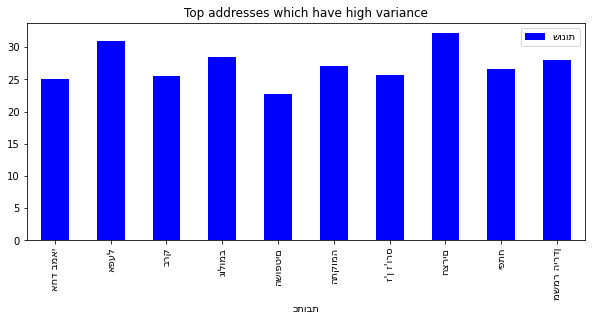

<Figure size 720x3600 with 0 Axes>

In [13]:
df10 = dfx.nlargest(10, 'שונות')
x = df10[['שונות']].groupby(['כתובת']).mean()
plt.rc('axes', prop_cycle=(cycler('color', ['b'])))

ax = x.plot(kind='bar', legend = True,figsize=(10,4))
plt.title('Top addresses which have high variance')
plt.figure(figsize=(10,50))
plt.show()

## Top 10 addresses which have many rooms

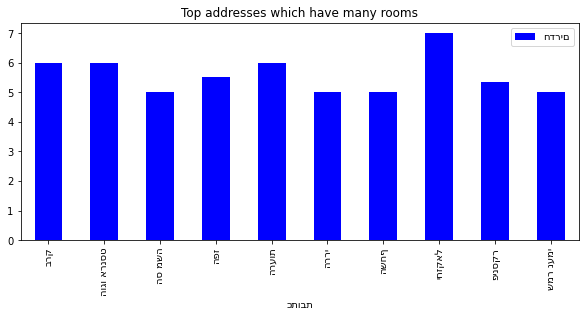

<Figure size 720x3600 with 0 Axes>

In [14]:
df10 = dfx.nlargest(10, 'חדרים')
x = df10[['חדרים']].groupby(['כתובת']).mean()
plt.rc('axes', prop_cycle=(cycler('color', ['b'])))

ax = x.plot(kind='bar', legend = True,figsize=(10,4))
plt.title('Top addresses which have many rooms')
plt.figure(figsize=(10,50))
plt.show()

## Top 10 addresses which have large size

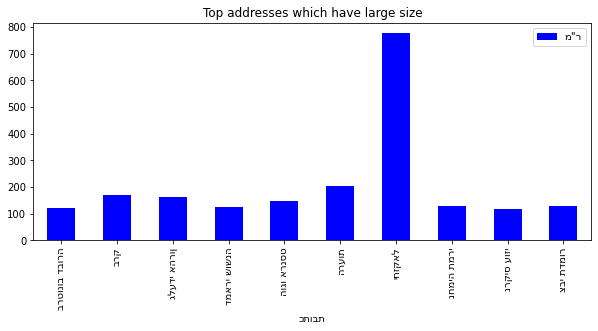

<Figure size 720x3600 with 0 Axes>

In [15]:
df10 = dfx.nlargest(10, 'מ"ר')
x = df10[['מ"ר']].groupby(['כתובת']).mean()
plt.rc('axes', prop_cycle=(cycler('color', ['b'])))

ax = x.plot(kind='bar', legend = True,figsize=(10,4))
plt.title('Top addresses which have large size')
plt.figure(figsize=(10,50))
plt.show()

## Top 10 addresses which have high prices

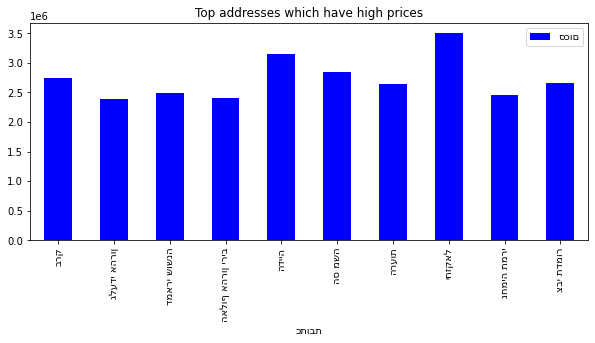

<Figure size 720x3600 with 0 Axes>

In [16]:
df10 = dfx.nlargest(10, 'סכום')
x = df10[['סכום']].groupby(['כתובת']).mean()
plt.rc('axes', prop_cycle=(cycler('color', ['b'])))

ax = x.plot(kind='bar', legend = True,figsize=(10,4))
plt.title('Top addresses which have high prices')
plt.figure(figsize=(10,50))
plt.show()

## The mean variance following to months

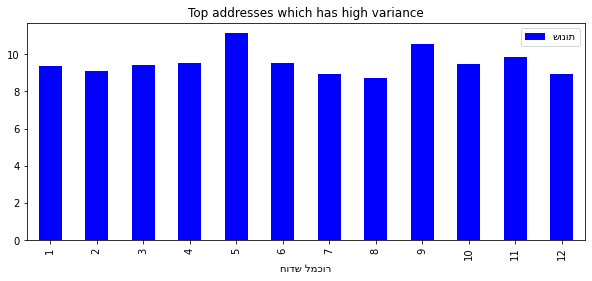

<Figure size 720x3600 with 0 Axes>

In [17]:
dfx = df.groupby('חודש למכור').mean()
df10 = dfx.nlargest(12, 'שונות')
x = df10[['שונות']].groupby(['חודש למכור']).mean()
plt.rc('axes', prop_cycle=(cycler('color', ['b'])))

ax = x.plot(kind='bar', legend = True,figsize=(10,4))
plt.title('Top addresses which has high variance')
plt.figure(figsize=(10,50))
plt.show()

# Research Questions

In [27]:
def get_accuracy(dt:DecisionTreeClassifier, X, y, n_jobs):
    return 1 - dt.score(X,y)*n_jobs

def get_validation_score(cv, n_jobs):
    clf = DecisionTreeClassifier()
  # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv = cv, n_jobs = n_jobs)
    return (1 - scores*n_jobs)

## Question 1. 
*In what address its the most recommended to buy an apartment for investment (where the price change is higher during the years)?*

### Splitting the data to make it the test and train

In [28]:
X = df[['שונות']]
y = df['מזהה'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Build Decision Tree Classifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Test Accuracy

In [30]:
cv = 5
n_jobs = 40
test_accuracy = get_accuracy(dt, X_test, y_test, n_jobs)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.5451505016722408


### Find the address its the most recommended to buy an apartment for investment

In [31]:
bestID = dt.predict([[1000]])[0]
dfx = df.groupby('כתובת').mean()
best_adress = dfx[dfx['מזהה']==bestID].index.to_list()[0]
print('The adress which has high variance: ', best_adress)

The adress which has high variance:  גולומב


### Model Validation

[0.57190635 0.70568562 0.59866221 0.46452477 0.54484605]


Text(0.5, 1.0, 'Validation Accuracy')

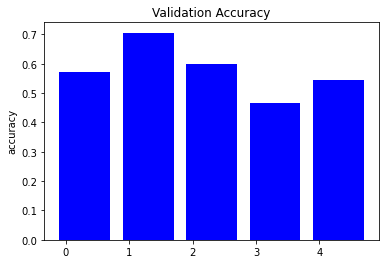

In [32]:
valid_accuracy = get_validation_score(cv, n_jobs)

index = np.arange(5) + 0.3
print(valid_accuracy)
plt.bar(index, valid_accuracy)
plt.ylabel("accuracy")
plt.title('Validation Accuracy')

## Question 2. 
*Which apartment size makes the better returns on investment?*

### Splitting the data to make it the test and train

In [33]:
X =df[['שונות']]
y = df['מ"ר'].values
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

### Build Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Test Accuracy

In [35]:
test_accuracy = get_accuracy(dt, X_test, y_test, n_jobs)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.4916387959866221


### Find the appartment size makes the better returns on investment.

In [36]:
best_size = dt.predict([[1000]])[0]
print('The apartment size makes the better returns on investment: ', best_size)

The apartment size makes the better returns on investment:  43


### Model Validation

[0.41137124 0.51839465 0.43812709 0.3038822  0.437751  ]


Text(0.5, 1.0, 'Validation Accuracy')

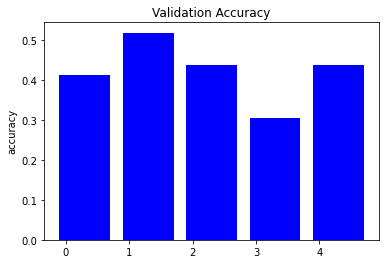

In [37]:
valid_accuracy = get_validation_score(cv, n_jobs)

index = np.arange(5) + 0.3
print(valid_accuracy)
plt.bar(index, valid_accuracy)
plt.ylabel("accuracy")
plt.title('Validation Accuracy')

## Question 3. 
*What month will be the best to sell the apartment to make maximum profit?*

### Splitting the data to make it the test and train

In [38]:
X =df[['שונות']]
y = df['חודש למכור'].values
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

### Build Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Test Accuracy

In [40]:
cv = 5
n_jobs = 8
test_accuracy = get_accuracy(dt, X_test, y_test,n_jobs)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.2615384615384615


### Find the month will be the best to sell the apartment to make maximum profit.

In [41]:
best_month = dt.predict([[1000]])[0]
print('The month will be the best to sell the apartment to make maximum profit: ', best_month)

The month will be the best to sell the apartment to make maximum profit:  5


### Model Validation

[0.65217391 0.6548495  0.65752508 0.6626506  0.67068273]


Text(0.5, 1.0, 'Validation Accuracy')

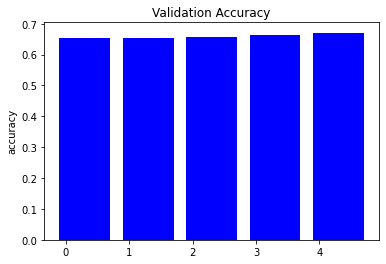

In [42]:
cv = 5
n_jobs = 4
valid_accuracy = get_validation_score(cv, n_jobs)

index = np.arange(5) + 0.3
print(valid_accuracy)
plt.bar(index, valid_accuracy)
plt.ylabel("accuracy")
plt.title('Validation Accuracy')